In [1]:
import requests

In [2]:
pip install -U pysal

Note: you may need to restart the kernel to use updated packages.


In [3]:
import urllib.request
from zipfile import ZipFile
import json
import io
import zipfile
import geopandas as gpd
from shapely.geometry import shape  
import osr
import pandas as pd
import pysal as ps
import numpy as np
import requests
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#specify zipped shapefile url
state_file_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_500k.zip"
r=requests.get(state_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))

##### A test to map from TARGER Zip File:

In [35]:
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json



In [54]:
States= geopandas.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_500k.zip")


m = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap, close_popup_on_click=False)


geo_data = GeoData(geo_dataframe = States,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')


m.add_layer(geo_data)
m.add_control(LayersControl())

In [37]:
m

Map(center=[52.3, 8.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

In [70]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [71]:
usa_state = gpd.read_file(state_file_url)

In [72]:
usa_state.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [73]:
usa_state.head

<bound method NDFrame.head of    STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
0       66  01802705  0400000US66    66     GU   
1       48  01779801  0400000US48    48     TX   
2       55  01779806  0400000US55    55     WI   
3       44  01219835  0400000US44    44     RI   
4       36  01779796  0400000US36    36     NY   
5       78  01802710  0400000US78    78     VI   
6       33  01779794  0400000US33    33     NH   
7       27  00662849  0400000US27    27     MN   
8       72  01779808  0400000US72    72     PR   
9       29  01779791  0400000US29    29     MO   
10      37  01027616  0400000US37    37     NC   
11      26  01779789  0400000US26    26     MI   
12      22  01629543  0400000US22    22     LA   
13      31  01779792  0400000US31    31     NE   
14      06  01779778  0400000US06    06     CA   
15      56  01779807  0400000US56    56     WY   
16      45  01779799  0400000US45    45     SC   
17      69  01779809  0400000US69    69     MP   
18      20  00481813

In [74]:
usa_state.head(1)

STATEFP   STATENS     AFFGEOID GEOID STUSPS  NAME LSAD      ALAND  \
0      66  01802705  0400000US66    66     GU  Guam   00  543555847   

      AWATER                                           geometry  
0  934337453  MULTIPOLYGON (((144.64538 13.23627, 144.64716 ...

In [75]:
print(type(usa_state))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [76]:
#predicates= {}
#get_vars= ["NAME","geometry","GEOID","AFFGEOID","STATEFP"]
#predicates["get"]= ",". join(get_vars)
#predicates["for"]= "state:*"
#r2= requests.get(state_file_url, params= predicates)

In [77]:
#This code SAVEs the shp. in a folder name: "maps"
#r= requests.get(url, stream=True)
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall("maps")
#print(z)

In [78]:
#filenames = [y for y in sorted(r2.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
#print(filenames)

In [79]:
census_api_key= '75b228a93b0b0592dd6d820dc0077020a546514a'
pop_url_str= 'https://api.census.gov/data/2019/acs/acs5?get=B01003_001E,NAME,GEO_ID&for=state:*&key='+census_api_key

predicates= {}
get_vars= ["NAME","GEO_ID","B01003_001E"]
predicates["get"]= ",". join(get_vars)
predicates["for"]= "state:*"
r2= requests.get(pop_url_str, params= predicates)

In [80]:
print(r2.text)

[["B01003_001E","NAME","GEO_ID","state"],
["4876250","Alabama","0400000US01","01"],
["737068","Alaska","0400000US02","02"],
["7050299","Arizona","0400000US04","04"],
["2999370","Arkansas","0400000US05","05"],
["39283497","California","0400000US06","06"],
["5610349","Colorado","0400000US08","08"],
["957248","Delaware","0400000US10","10"],
["692683","District of Columbia","0400000US11","11"],
["3575074","Connecticut","0400000US09","09"],
["20901636","Florida","0400000US12","12"],
["10403847","Georgia","0400000US13","13"],
["1717750","Idaho","0400000US16","16"],
["1422094","Hawaii","0400000US15","15"],
["12770631","Illinois","0400000US17","17"],
["6665703","Indiana","0400000US18","18"],
["3139508","Iowa","0400000US19","19"],
["2910652","Kansas","0400000US20","20"],
["4449052","Kentucky","0400000US21","21"],
["4664362","Louisiana","0400000US22","22"],
["1335492","Maine","0400000US23","23"],
["6018848","Maryland","0400000US24","24"],
["6850553","Massachusetts","0400000US25","25"],
["9965265

In [81]:
print(r2.json()[0])

['B01003_001E', 'NAME', 'GEO_ID', 'state']


In [82]:
col_names= ["total_pop","Name", "GEO_ID", "state"]
df= pd.DataFrame (columns=col_names, data=r2.json()[1:])
#fix data types
df["total_pop"]= df["total_pop"].astype(int)
df.head()

total_pop        Name       GEO_ID state
0    4876250     Alabama  0400000US01    01
1     737068      Alaska  0400000US02    02
2    7050299     Arizona  0400000US04    04
3    2999370    Arkansas  0400000US05    05
4   39283497  California  0400000US06    06

In [83]:
df2= pd.DataFrame (usa_state)
print (df2)

   STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
0       66  01802705  0400000US66    66     GU   
1       48  01779801  0400000US48    48     TX   
2       55  01779806  0400000US55    55     WI   
3       44  01219835  0400000US44    44     RI   
4       36  01779796  0400000US36    36     NY   
5       78  01802710  0400000US78    78     VI   
6       33  01779794  0400000US33    33     NH   
7       27  00662849  0400000US27    27     MN   
8       72  01779808  0400000US72    72     PR   
9       29  01779791  0400000US29    29     MO   
10      37  01027616  0400000US37    37     NC   
11      26  01779789  0400000US26    26     MI   
12      22  01629543  0400000US22    22     LA   
13      31  01779792  0400000US31    31     NE   
14      06  01779778  0400000US06    06     CA   
15      56  01779807  0400000US56    56     WY   
16      45  01779799  0400000US45    45     SC   
17      69  01779809  0400000US69    69     MP   
18      20  00481813  0400000US20    20     KS   


In [84]:
df_map= df2.set_index('AFFGEOID').join(df.set_index('GEO_ID'))
print (df_map)

            STATEFP   STATENS GEOID STUSPS  \
AFFGEOID                                     
0400000US66      66  01802705    66     GU   
0400000US48      48  01779801    48     TX   
0400000US55      55  01779806    55     WI   
0400000US44      44  01219835    44     RI   
0400000US36      36  01779796    36     NY   
0400000US78      78  01802710    78     VI   
0400000US33      33  01779794    33     NH   
0400000US27      27  00662849    27     MN   
0400000US72      72  01779808    72     PR   
0400000US29      29  01779791    29     MO   
0400000US37      37  01027616    37     NC   
0400000US26      26  01779789    26     MI   
0400000US22      22  01629543    22     LA   
0400000US31      31  01779792    31     NE   
0400000US06      06  01779778    06     CA   
0400000US56      56  01779807    56     WY   
0400000US45      45  01779799    45     SC   
0400000US69      69  01779809    69     MP   
0400000US20      20  00481813    20     KS   
0400000US10      10  01779781    1

### Add column population density

In [85]:
sq_meter_per_square_mile = 2589988.1103
df_map['population_density']= df_map['total_pop'] / (df_map['ALAND'] / sq_meter_per_square_mile)

# don't display left 5 columns
# iloc slice by index integer position. all rows, column >= 5
# https://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation-how-are-they-different#31593712
df_map.iloc[:, 5:].sort_values(by=['population_density'], ascending=False).head()

LSAD        ALAND      AWATER  \
AFFGEOID                                    
0400000US11   00    158316124    18709762   
0400000US34   00  19048737655  3533261945   
0400000US44   00   2677759219  1323691129   
0400000US72   00   8868948653  4922329963   
0400000US25   00  20204396898  7130653806   

                                                      geometry  total_pop  \
AFFGEOID                                                                    
0400000US11  POLYGON ((-77.11976 38.93434, -77.11253 38.940...   692683.0   
0400000US34  MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ...  8878503.0   
0400000US44  MULTIPOLYGON (((-71.28802 41.64558, -71.28647 ...  1057231.0   
0400000US72  MULTIPOLYGON (((-65.23805 18.32167, -65.23467 ...  3318447.0   
0400000US25  MULTIPOLYGON (((-70.23405 41.28565, -70.22122 ...  6850553.0   

                             Name state  population_density  
AFFGEOID                                                     
0400000US11  District of Columbia    11        11332.015267  
0400000US34            New Jersey    34         1207.178010  
0400000US44          Rhode Island    44         1022.577273  
0400000US72           Puerto Rico    72          969.081975  
0400000US25         Massachusetts    25          878.167802

In [86]:
df_map.iloc[:, 5:].sort_values(by=['population_density'], ascending=False).tail()

LSAD          ALAND        AWATER  \
AFFGEOID                                        
0400000US02   00  1478941109938  245380162784   
0400000US66   00      543555847     934337453   
0400000US78   00      348021914    1550236187   
0400000US69   00      472292528    4644252458   
0400000US60   00      197759069    1307243751   

                                                      geometry  total_pop  \
AFFGEOID                                                                    
0400000US02  MULTIPOLYGON (((-147.48341 60.72943, -147.4781...   737068.0   
0400000US66  MULTIPOLYGON (((144.64538 13.23627, 144.64716 ...        NaN   
0400000US78  MULTIPOLYGON (((-64.62799 17.78933, -64.62717 ...        NaN   
0400000US69  MULTIPOLYGON (((146.05103 16.00674, 146.05167 ...        NaN   
0400000US60  MULTIPOLYGON (((-168.14582 -14.54791, -168.145...        NaN   

               Name state  population_density  
AFFGEOID                                       
0400000US02  Alaska    02            1.290787  
0400000US66     NaN   NaN                 NaN  
0400000US78     NaN   NaN                 NaN  
0400000US69     NaN   NaN                 NaN  
0400000US60     NaN   NaN                 NaN

In [87]:
#delete outliers
df_map_US= df_map.set_index("NAME")
df_map_US.sort_values(by= "STUSPS", ascending=True)

STATEFP   STATENS GEOID STUSPS  \
NAME                                                                          
Alaska                                            02  01785533    02     AK   
Alabama                                           01  01779775    01     AL   
Arkansas                                          05  00068085    05     AR   
American Samoa                                    60  01802701    60     AS   
Arizona                                           04  01779777    04     AZ   
California                                        06  01779778    06     CA   
Colorado                                          08  01779779    08     CO   
Connecticut                                       09  01779780    09     CT   
District of Columbia                              11  01702382    11     DC   
Delaware                                          10  01779781    10     DE   
Florida                                           12  00294478    12     FL   
Georgia                                           13  01705317    13     GA   
Guam                                              66  01802705    66     GU   
Hawaii                                            15  01779782    15     HI   
Iowa                                              19  01779785    19     IA   
Idaho                                             16  01779783    16     ID   
Illinois                                          17  01779784    17     IL   
Indiana                                           18  00448508    18     IN   
Kansas                                            20  00481813    20     KS   
Kentucky                                          21  01779786    21     KY   
Louisiana                                         22  01629543    22     LA   
Massachusetts                                     25  00606926    25     MA   
Maryland                                          24  01714934    24     MD   
Maine                                             23  01779787    23     ME   
Michigan                                          26  01779789    26     MI   
Minnesota                                         27  00662849    27     MN   
Missouri                                          29  01779791    29     MO   
Commonwealth of the Northern Mariana Islands      69  01779809    69     MP   
Mississippi                                       28  01779790    28     MS   
Montana                                           30  00767982    30     MT   
North Carolina                                    37  01027616    37     NC   
North Dakota                                      38  01779797    38     ND   
Nebraska                                          31  01779792    31     NE   
New Hampshire                                     33  01779794    33     NH   
New Jersey                                        34  01779795    34     NJ   
New Mexico                                        35  00897535    35     NM   
Nevada                                            32  01779793    32     NV   
New York                                          36  01779796    36     NY   
Ohio                                              39  01085497    39     OH   
Oklahoma                                          40  01102857    40     OK   
Oregon                                            41  01155107    41     OR   
Pennsylvania                                      42  01779798    42     PA   
Puerto Rico                                       72  01779808    72     PR   
Rhode Island                                      44  01219835    44     RI   
South Carolina                                    45  01779799    45     SC   
South Dakota                                      46  01785534    46     SD   
Tennessee                                         47  01325873    47     TN   
Texas                                             48  01779801    48     TX   
Utah                                              49  01455989    49     UT   
Virginia        

In [88]:
df_map_US= df_map_US.drop(["Alaska", "American Samoa", "Guam", "Hawaii", "Commonwealth of the Northern Mariana Islands", "Puerto Rico", "United States Virgin Islands"  ])

In [89]:
#find state with lowest population density
df_map_US.loc[df_map_US['population_density'].idxmin()]

STATEFP                                                              56
STATENS                                                        01779807
GEOID                                                                56
STUSPS                                                               WY
LSAD                                                                 00
ALAND                                                      251458712277
AWATER                                                       1867503715
geometry              POLYGON ((-111.054556 45.000955, -111.04506604...
total_pop                                                        581024
Name                                                            Wyoming
state                                                                56
population_density                                              5.98446
Name: Wyoming, dtype: object

#### sort by population density

In [90]:
# select 2 columns, sort.
# doesn't mutate dataframe if don't set inplace True and don't reassign to df_map
df_map_US[['Name','population_density']].sort_values(by= 'population_density', ascending=False).head()

Name  population_density
NAME                                                          
District of Columbia  District of Columbia        11332.015267
New Jersey                      New Jersey         1207.178010
Rhode Island                  Rhode Island         1022.577273
Massachusetts                Massachusetts          878.167802
Connecticut                    Connecticut          738.289676

In [91]:
#Add column awater_frac
df_map_US['awater_frac'] = df_map_US['AWATER'] / (df_map_US['ALAND'] + df_map_US['AWATER'])
df_map_US.iloc[:, 5:].sort_values(by=['awater_frac'], ascending=False).head()

ALAND        AWATER  \
NAME                                        
Michigan       146614604273  103872203398   
Rhode Island     2677759219    1323691129   
Massachusetts   20204396898    7130653806   
Florida        138958484319   45975808217   
Maryland        25151895765    6979171386   

                                                        geometry   total_pop  \
NAME                                                                           
Michigan       MULTIPOLYGON (((-86.74819 46.51560, -86.74617 ...   9965265.0   
Rhode Island   MULTIPOLYGON (((-71.28802 41.64558, -71.28647 ...   1057231.0   
Massachusetts  MULTIPOLYGON (((-70.23405 41.28565, -70.22122 ...   6850553.0   
Florida        MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...  20901636.0   
Maryland       MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ...   6018848.0   

                        Name state  population_density  awater_frac  
NAME                                                                 
Michigan            Michigan    26          176.039202     0.414681  
Rhode Island    Rhode Island    44         1022.577273     0.330803  
Massachusetts  Massachusetts    25          878.167802     0.260861  
Florida              Florida    12          389.576707     0.248606  
Maryland            Maryland    24          619.784087     0.217209

In [92]:
df_map_US= gpd.GeoDataFrame(df_map_US, geometry='geometry')

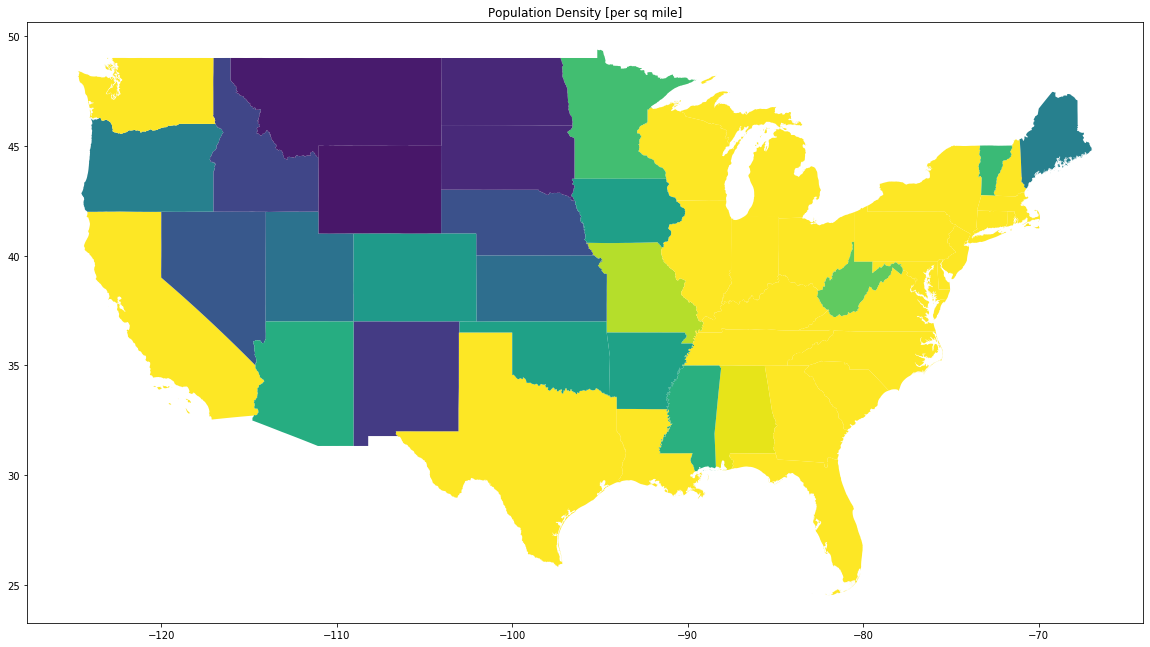

In [32]:
# cx coordinate based indexing slice by longitude, latitude
df_map_US = df_map_US.cx[-179:-65, 0:80]

cmap = 'viridis'
num_colors = 40
vmin=0
vmax=100

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
figsize= (20,20)
fig, ax= plt.subplots (1,1, figsize=figsize)
ax.set_title("Population Density [per sq mile]")

df_map_US.plot(column='population_density', cmap=cmap, ax=ax, k=num_colors, legend=False, vmin=vmin, vmax=vmax)

#### Increase plot vertical size - workaround, omit Alaska and Hawaii

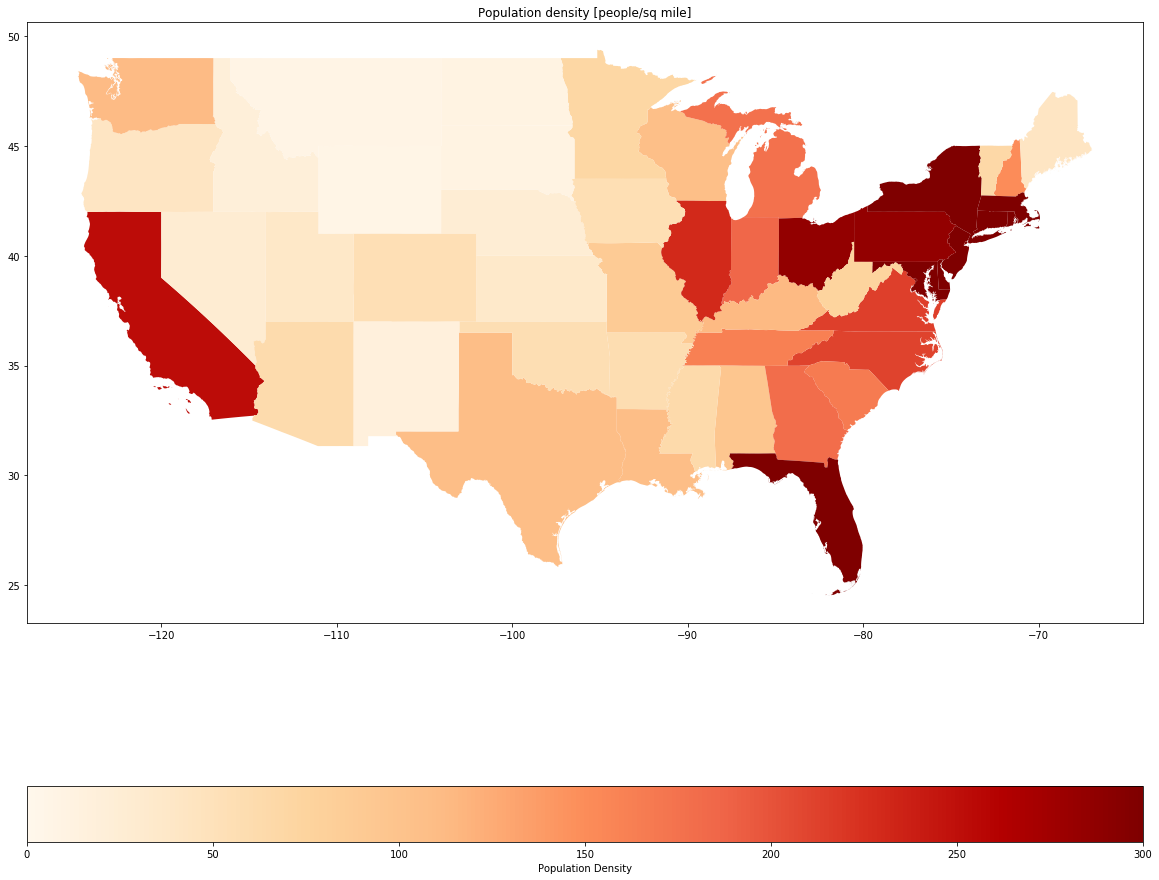

In [33]:
# cx coordinate based indexing
# http://geopandas.org/indexing.html
df_map_US = df_map_US.cx[-120:-65, 0:80]

num_colors = 40
vmin=0
vmax=300

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
figsize = (20, 20)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Population density [people/sq mile]')
df_map_US.plot(column='population_density', cmap='OrRd', ax=ax, k=num_colors, legend=True, vmin=vmin, vmax=vmax, legend_kwds={'label': "Population Density", 'orientation': "horizontal"})

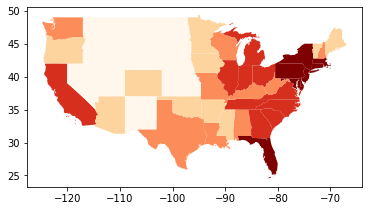

In [34]:
df_map_US.plot(column='population_density', cmap='OrRd', scheme='quantiles');

#### Plot chloropleth map of awater_frac

### Pop ranked Counties

In [97]:
county_file_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_500k.zip"
r3=requests.get(state_file_url)
z=zipfile.ZipFile(io.BytesIO(r3.content))

In [98]:
usa_county = gpd.read_file(county_file_url)

In [99]:
usa_county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [100]:
usa_county.head(1)

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID   NAME      NAMELSAD  \
0      21      141  00516917  0500000US21141  21141  Logan  Logan County   

  STUSPS STATE_NAME LSAD       ALAND    AWATER  \
0     KY   Kentucky   06  1430224002  12479211   

                                            geometry  
0  POLYGON ((-87.06037 36.68085, -87.06002 36.708...

In [101]:
census_api_key= '75b228a93b0b0592dd6d820dc0077020a546514a'
pop_url_str= 'https://api.census.gov/data/2019/acs/acs5?get=B01003_001E,NAME,GEO_ID&for=county:*&key='+census_api_key

predicates= {}
get_vars= ["NAME","GEO_ID","B01003_001E"]
predicates["get"]= ",". join(get_vars)
predicates["for"]= "state:*"
r4= requests.get(pop_url_str, params= predicates)

In [102]:
print(r4.text)

[["B01003_001E","NAME","GEO_ID","state","county"],
["21565","Fayette County, Illinois","0500000US17051","17","051"],
["29003","Logan County, Illinois","0500000US17107","17","107"],
["23994","Saline County, Illinois","0500000US17165","17","165"],
["701473","Lake County, Illinois","0500000US17097","17","097"],
["14219","Massac County, Illinois","0500000US17127","17","127"],
["12493","Cass County, Illinois","0500000US17017","17","017"],
["36359","Huntington County, Indiana","0500000US18069","18","069"],
["24149","White County, Indiana","0500000US18181","18","181"],
["20840","Jay County, Indiana","0500000US18075","18","075"],
["44438","Shelby County, Indiana","0500000US18145","18","145"],
["20730","Sullivan County, Indiana","0500000US18153","18","153"],
["191553","Tippecanoe County, Indiana","0500000US18157","18","157"],
["323117","Hamilton County, Indiana","0500000US18057","18","057"],
["82481","Bartholomew County, Indiana","0500000US18005","18","005"],
["20096","Fulton County, Indiana","

In [103]:
print(r4.json()[0])

['B01003_001E', 'NAME', 'GEO_ID', 'state', 'county']


In [104]:
col_names= ["total_pop","Name", "GEO_ID", "State", "County"]
df= pd.DataFrame (columns=col_names, data=r4.json()[1:])
#fix data types
df["total_pop"]= df["total_pop"].astype(int)
df.head()

total_pop                      Name          GEO_ID State County
0      21565  Fayette County, Illinois  0500000US17051    17    051
1      29003    Logan County, Illinois  0500000US17107    17    107
2      23994   Saline County, Illinois  0500000US17165    17    165
3     701473     Lake County, Illinois  0500000US17097    17    097
4      14219   Massac County, Illinois  0500000US17127    17    127

In [105]:
df2= pd.DataFrame (usa_county)
print (df2)

     STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME  \
0         21      141  00516917  0500000US21141  21141       Logan   
1         36      081  00974139  0500000US36081  36081      Queens   
2         34      017  00882278  0500000US34017  34017      Hudson   
3         34      019  00882228  0500000US34019  34019   Hunterdon   
4         21      147  00516926  0500000US21147  21147    McCreary   
...      ...      ...       ...             ...    ...         ...   
3229      08      014  01945881  0500000US08014  08014  Broomfield   
3230      08      121  00198176  0500000US08121  08121  Washington   
3231      27      037  00659464  0500000US27037  27037      Dakota   
3232      31      161  00835902  0500000US31161  31161    Sheridan   
3233      35      037  00929110  0500000US35037  35037        Quay   

               NAMELSAD STUSPS  STATE_NAME LSAD       ALAND     AWATER  \
0          Logan County     KY    Kentucky   06  1430224002   12479211   
1         Q

In [106]:
df_map_county= df2.set_index('AFFGEOID').join(df.set_index('GEO_ID'))
print (df_map_county)

               STATEFP COUNTYFP  COUNTYNS  GEOID        NAME  \
AFFGEOID                                                       
0500000US21141      21      141  00516917  21141       Logan   
0500000US36081      36      081  00974139  36081      Queens   
0500000US34017      34      017  00882278  34017      Hudson   
0500000US34019      34      019  00882228  34019   Hunterdon   
0500000US21147      21      147  00516926  21147    McCreary   
...                ...      ...       ...    ...         ...   
0500000US08014      08      014  01945881  08014  Broomfield   
0500000US08121      08      121  00198176  08121  Washington   
0500000US27037      27      037  00659464  27037      Dakota   
0500000US31161      31      161  00835902  31161    Sheridan   
0500000US35037      35      037  00929110  35037        Quay   

                         NAMELSAD STUSPS  STATE_NAME LSAD       ALAND  \
AFFGEOID                                                                
0500000US21141       

#### Add column population density

In [45]:
sq_meter_per_square_mile = 2589988.1103
df_map_county['population_density']= df_map_county['total_pop'] / (df_map_county['ALAND'] / sq_meter_per_square_mile)

# don't display left 5 columns
# iloc slice by index integer position. all rows, column >= 5
# https://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation-how-are-they-different#31593712
df_map_county.iloc[:, 5:].sort_values(by=['population_density'], ascending=False).head()

NAMELSAD STUSPS  STATE_NAME LSAD      ALAND  \
AFFGEOID                                                                  
0500000US36061       New York County     NY    New York   06   58679457   
0500000US36047          Kings County     NY    New York   06  179684485   
0500000US36005          Bronx County     NY    New York   06  109224611   
0500000US36081         Queens County     NY    New York   06  281594050   
0500000US06075  San Francisco County     CA  California   06  121507089   

                   AWATER                                           geometry  \
AFFGEOID                                                                       
0500000US36061   29014840  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
0500000US36047   71158757  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
0500000US36005   39362153  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
0500000US36081  188444349  POLYGON ((-73.96262 40.73903, -73.96243 40.739...   
0500000US06075  479146790  MULTIPOLYGON (((-122.33225 37.78207, -122.3322...   

                total_pop                              Name State County  \
AFFGEOID                                                                   
0500000US36061  1631993.0         New York County, New York    36    061   
0500000US36047  2589974.0            Kings County, New York    36    047   
0500000US36005  1435068.0            Bronx County, New York    36    005   
0500000US36081  2287388.0           Queens County, New York    36    081   
0500000US06075   874961.0  San Francisco County, California    06    075   

                population_density  
AFFGEOID                            
0500000US36061        72032.746760  
0500000US36047        37332.115046  
0500000US36005        34029.043669  
0500000US36081        21038.469114  
0500000US06075        18650.258233

In [46]:
null_geo= pd.isnull(df_map_county["geometry"])

In [47]:
df_map_county[null_geo]

Empty DataFrame
Columns: [STATEFP, COUNTYFP, COUNTYNS, GEOID, NAME, NAMELSAD, STUSPS, STATE_NAME, LSAD, ALAND, AWATER, geometry, total_pop, Name, State, County, population_density]
Index: []

In [48]:
df_map_county.isnull()

STATEFP  COUNTYFP  COUNTYNS  GEOID   NAME  NAMELSAD  STUSPS  \
AFFGEOID                                                                      
0500000US21141    False     False     False  False  False     False   False   
0500000US36081    False     False     False  False  False     False   False   
0500000US34017    False     False     False  False  False     False   False   
0500000US34019    False     False     False  False  False     False   False   
0500000US21147    False     False     False  False  False     False   False   
...                 ...       ...       ...    ...    ...       ...     ...   
0500000US08014    False     False     False  False  False     False   False   
0500000US08121    False     False     False  False  False     False   False   
0500000US27037    False     False     False  False  False     False   False   
0500000US31161    False     False     False  False  False     False   False   
0500000US35037    False     False     False  False  False     False   False   

                STATE_NAME   LSAD  ALAND  AWATER  geometry  total_pop   Name  \
AFFGEOID                                                                       
0500000US21141       False  False  False   False     False      False  False   
0500000US36081       False  False  False   False     False      False  False   
0500000US34017       False  False  False   False     False      False  False   
0500000US34019       False  False  False   False     False      False  False   
0500000US21147       False  False  False   False     False      False  False   
...                    ...    ...    ...     ...       ...        ...    ...   
0500000US08014       False  False  False   False     False      False  False   
0500000US08121       False  False  False   False     False      False  False   
0500000US27037       False  False  False   False     False      False  False   
0500000US31161       False  False  False   False     False      False  False   
0500000US35037       False  False  False   False     False      False  False   

                State  County  population_density  
AFFGEOID                                           
0500000US21141  False   False               False  
0500000US36081  False   False               False  
0500000US34017  False   False               False  
0500000US34019  False   False               False  
0500000US21147  False   False               False  
...               ...     ...                 ...  
0500000US08014  False   False               False  
0500000US08121  False   False               False  
0500000US27037  False   False               False  
0500000US31161  False   False               False  
0500000US35037  False   False               False  

[3234 rows x 17 columns]

In [49]:
df_map_county.notnull()

STATEFP  COUNTYFP  COUNTYNS  GEOID  NAME  NAMELSAD  STUSPS  \
AFFGEOID                                                                     
0500000US21141     True      True      True   True  True      True    True   
0500000US36081     True      True      True   True  True      True    True   
0500000US34017     True      True      True   True  True      True    True   
0500000US34019     True      True      True   True  True      True    True   
0500000US21147     True      True      True   True  True      True    True   
...                 ...       ...       ...    ...   ...       ...     ...   
0500000US08014     True      True      True   True  True      True    True   
0500000US08121     True      True      True   True  True      True    True   
0500000US27037     True      True      True   True  True      True    True   
0500000US31161     True      True      True   True  True      True    True   
0500000US35037     True      True      True   True  True      True    True   

                STATE_NAME  LSAD  ALAND  AWATER  geometry  total_pop  Name  \
AFFGEOID                                                                     
0500000US21141        True  True   True    True      True       True  True   
0500000US36081        True  True   True    True      True       True  True   
0500000US34017        True  True   True    True      True       True  True   
0500000US34019        True  True   True    True      True       True  True   
0500000US21147        True  True   True    True      True       True  True   
...                    ...   ...    ...     ...       ...        ...   ...   
0500000US08014        True  True   True    True      True       True  True   
0500000US08121        True  True   True    True      True       True  True   
0500000US27037        True  True   True    True      True       True  True   
0500000US31161        True  True   True    True      True       True  True   
0500000US35037        True  True   True    True      True       True  True   

                State  County  population_density  
AFFGEOID                                           
0500000US21141   True    True                True  
0500000US36081   True    True                True  
0500000US34017   True    True                True  
0500000US34019   True    True                True  
0500000US21147   True    True                True  
...               ...     ...                 ...  
0500000US08014   True    True                True  
0500000US08121   True    True                True  
0500000US27037   True    True                True  
0500000US31161   True    True                True  
0500000US35037   True    True                True  

[3234 rows x 17 columns]

In [93]:
def rd2(x):
        return round (x,2)
    
minimum, maximum= df_map_US["population_density"].quantile([0.05, 0.95]).apply(rd2)
mean = round(df_map_US["population_density"].mean(), 2)


print(f"minimum: {minimum}", f"maximum: {maximum}", f"Mean: {mean}", sep="\n\n")  

minimum: 11.17

maximum: 964.81

Mean: 432.18


In [94]:
import branca

colormap = branca.colormap.LinearColormap(
    colors=["#f2f0f7", "#cbc9e2", "#9e9ac8", "#756bb1", "#54278f"],
    index=df_map_US["population_density"].quantile([0.2, 0.4, 0.6, 0.8]),
    vmin=minimum,
    vmax=maximum,
)

colormap.caption = "Population Density in the United States"

colormap

In [95]:
import folium
from folium.plugins import Search


m = folium.Map(location=[38, -97], zoom_start=4)

In [96]:
def style_function(x):
    return {
        "fillColor": colormap(x["properties"]["population_density"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }


stategeo = folium.GeoJson(
    df_map_US,
    name="US States",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["Name", "population_density"], aliases=["State", "Density"], localize=True
    ),
).add_to(m)

statesearch = Search(
    layer=stategeo,
    geom_type="Polygon",
    placeholder="Search for a US State",
    collapsed=False,
    search_label="Name",
    weight=3,
).add_to(m)

folium.LayerControl().add_to(m)
colormap.add_to(m)

m